In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

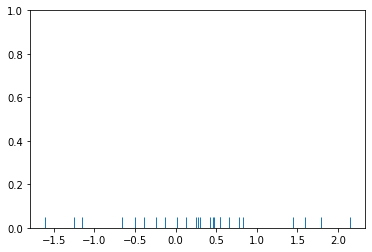

In [3]:
sns.rugplot(dataset)

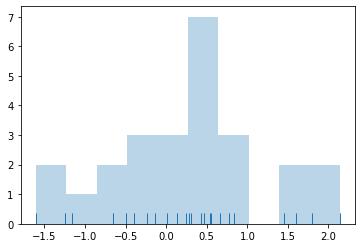

In [4]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

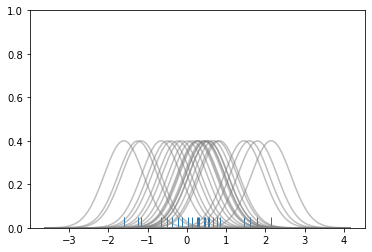

In [5]:
sns.rugplot(dataset);

x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を等間隔に100分割
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

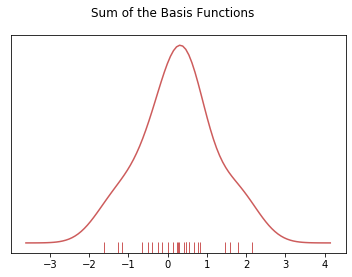

In [6]:
# 手動でKDEを作ります。
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset,c = 'indianred')

plt.yticks([])

plt.suptitle("Sum of the Basis Functions")


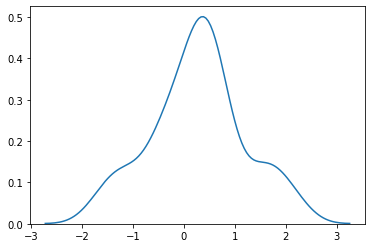

In [7]:
sns.kdeplot(dataset)

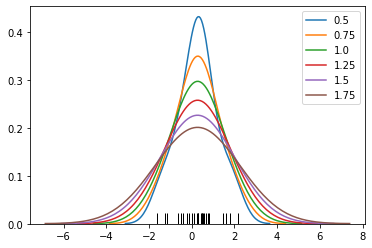

In [8]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)
    
# カーネル密度推定をする基底関数は色々ある
# 今回はガウス分布を使った

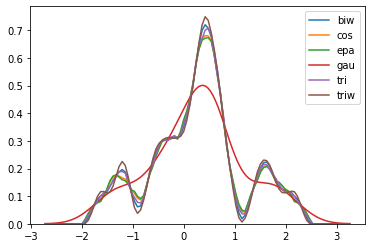

In [9]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

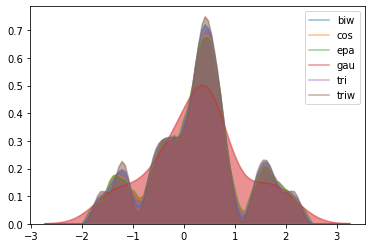

In [10]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

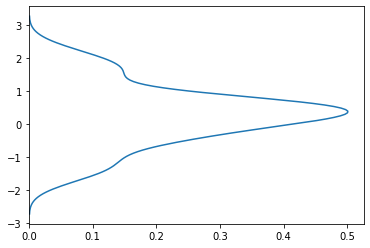

In [11]:
# 軸を入れ替える
sns.kdeplot(dataset,vertical=True)

(array([ 2.,  3.,  5.,  8., 11., 18., 21., 21., 23., 25.]),
 array([-1.60580019, -1.23084551, -0.85589083, -0.48093615, -0.10598147,
         0.26897322,  0.6439279 ,  1.01888258,  1.39383726,  1.76879194,
         2.14374662]),
 <a list of 10 Patch objects>)

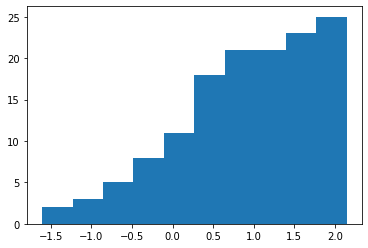

In [12]:
plt.hist(dataset, cumulative=True)

# 累積分布関数

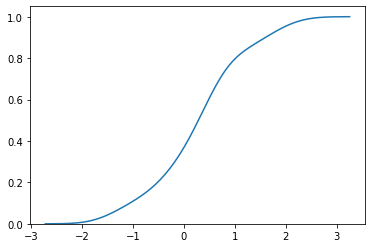

In [13]:
sns.kdeplot(dataset,cumulative=True)

In [14]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)

/Users/fujiiryou/.pyenv/versions/3.7.4/lib/python3.7/site-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


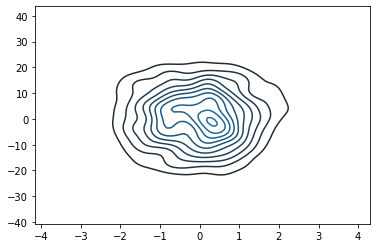

In [18]:
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)